In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [18]:
image_path = "lena.pgm"

In [19]:
def cv2_imshow(img):
  plt.figure(figsize=(8,5))
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

Reading an image in default mode

In [20]:
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [21]:
left_eye_start = (250, 260)
left_eye_end = (285, 280)

In [22]:
left_eye_x = 249
left_eye_y = 252
left_eye_w = 38
left_eye_h = 27

skin_color = image[left_eye_y - 20:left_eye_y, left_eye_x:left_eye_x + left_eye_w].mean()

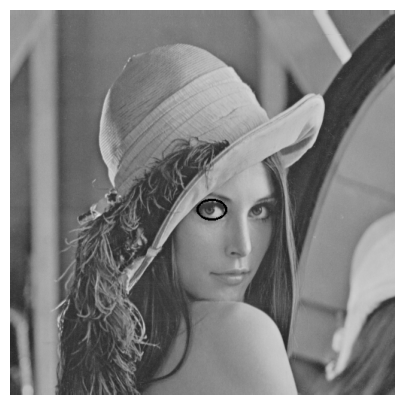

In [23]:
teste = image.copy()
teste = cv2.ellipse(teste, (left_eye_x + left_eye_w//2, left_eye_y + left_eye_h//2), (left_eye_w//2, left_eye_h//2), 0, 0, 360, (0, 0, 255), 2)

cv2_imshow(teste)

Blinking eye functions

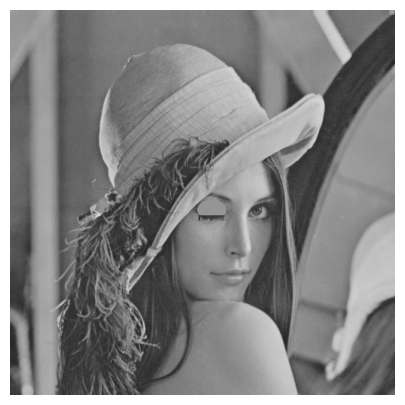

In [24]:
def blink_with_ellipse(image, x, y, w, h, skin_color):
    eyebrow_start_x = x + 2
    eyebrow_start_y = y + 2
    eyebrow_w = w - 4
    eyebrow_h = h - 20
    (cX, cY) = (eyebrow_w // 2, eyebrow_h // 2)
    
    eyebrow_region = image[eyebrow_start_y:eyebrow_start_y + eyebrow_h, eyebrow_start_x:eyebrow_start_x + eyebrow_w].copy()
    
    # Rotate eyebrow 180 degrees to look more natural
    M = cv2.getRotationMatrix2D(center=(cX, cY), angle=180, scale=1) 
    eyebrow_closed = cv2.warpAffine(eyebrow_region, M, (eyebrow_w, eyebrow_h))
    
    img_closed_eye = image.copy()

    # Closed eye will have skin color tone
    cv2.ellipse(img_closed_eye, (x + w//2, y + h//2), (w//2, h//2), 0, 0, 360, int(skin_color), -1)
    
    closed_eyebrow_y = eyebrow_start_x + h - 5
    img_closed_eye[closed_eyebrow_y:closed_eyebrow_y + eyebrow_h, eyebrow_start_x:eyebrow_start_x + eyebrow_w] = eyebrow_closed

    return img_closed_eye

blinked_image = blink_with_ellipse(image, left_eye_x, left_eye_y, left_eye_w, left_eye_h, skin_color)

cv2_imshow(blinked_image)

In [25]:
def blink_multiple_times(image, x, y, w, h, skin_color, n_blinks=3, delay=0.5):
    img_closed_eye = blink_with_ellipse(image, x, y, w, h, skin_color)

    for _ in range(n_blinks):
        cv2.imshow('Lena Blinking with Ellipse', image)
        cv2.waitKey(500)
        
        cv2.imshow('Lena Blinking with Ellipse', img_closed_eye)
        cv2.waitKey(500)

# blink_multiple_times(image, left_eye_x, left_eye_y, left_eye_w, left_eye_h, skin_color)

# # Close windows
# cv2.destroyAllWindows()

In [34]:
def blink_multiple_times_save_mp4(image, x, y, w, h, skin_color, n_blinks=3, delay=0.7, output_file='eye_blinking.mp4'):
    # Video parameters
    frame_height, frame_width = image.shape[:2]
    fps = 10
    fourcc = cv2.VideoWriter_fourcc(*'mp4v') 
    video_writer = cv2.VideoWriter(output_file, fourcc, fps, (frame_width, frame_height), isColor=False)

    img_closed_eye = blink_with_ellipse(image, x, y, w, h, skin_color)

    # Animation
    for _ in range(n_blinks):
        for _ in range(int(fps * delay)): 
            video_writer.write(image)

        for _ in range(int(fps * delay)):
            video_writer.write(img_closed_eye)
    
    video_writer.write(image)
   
    video_writer.release()


blink_multiple_times_save_mp4(image, left_eye_x, left_eye_y, left_eye_w, left_eye_h, skin_color)